In [161]:
from models import MobileNetV2Model, output_shape
from transforms import eval_data_transform as transform
from helpers import get_is_healthy_plant_disease
import torch
import numpy as np
from PIL import Image, ImageFile
from transforms import eval_data_transform
import pickle

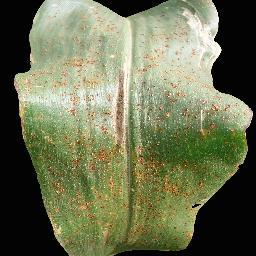

In [162]:
img = Image.open("./data/manual_test/CornCommonRust2.JPG")
img

In [163]:
img_tensor = eval_data_transform(img).unsqueeze(dim=0)
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [164]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [165]:
torch.manual_seed(42)
model = MobileNetV2Model(output_shape).to(device)
model.load_state_dict(torch.load("./models/mobilenet_v2_model.pt"))
model.eval()

MobileNetV2Model(
  (model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size

In [166]:
with open("./models/classes.pkl", "rb") as f:
    classes = pickle.load(f)

In [168]:
def predict(img: ImageFile):
    img_tensor = transform(img).unsqueeze(dim=0).to(device)

    with torch.inference_mode():
        pred = model(img_tensor)
        pred = torch.softmax(pred, dim=1)
        proba = round(pred.max().item(), 5)
        pred = pred.argmax(dim=1).item()
        result = get_is_healthy_plant_disease(classes[pred])
        result["probability"] = proba
        return result

In [169]:
predict(img)

{'is_healthy': False,
 'plant': 'corn',
 'disease': 'common rust',
 'probability': 0.99972}